In [1]:
# Set seed for reproducibility
SEED = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import PyTorch
import torch
torch.manual_seed(SEED)
from torch import nn
from torch.utils.data import DataLoader

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

PyTorch version: 2.8.0+cu126
Device: cpu


In [2]:
df_test = pd.read_csv("pirate_pain_test.csv", on_bad_lines='skip')
df_test.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,2,2,2,two,two,two,0.842535,...,0.000003,0.000004,0.000003,0.000003,0.000068,0.019372,0.066324,0.022228,0.013576,0.5
1,0,1,2,2,2,2,two,two,two,0.898836,...,0.000003,0.000004,0.000004,0.000003,0.000029,0.069747,0.080417,0.023650,0.038793,0.5
2,0,2,2,2,2,2,two,two,two,0.957765,...,0.000006,0.000004,0.000009,0.000004,0.000008,0.054968,0.058811,0.027023,0.054202,0.5
3,0,3,1,2,2,2,two,two,two,0.832596,...,0.000005,0.000004,0.000003,0.000004,0.000015,0.048695,0.047128,0.016151,0.024983,0.5
4,0,4,2,2,2,0,two,two,two,0.805971,...,0.000006,0.000004,0.000003,0.000003,0.000008,0.019762,0.031116,0.015618,0.017931,0.5


In [3]:
df_train= pd.read_csv("pirate_pain_train.csv", on_bad_lines='skip')
df_train.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,0,2,1,two,two,two,1.094705,...,3.499558e-06,1.945042e-06,0.000004,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5
1,0,1,2,2,2,2,two,two,two,1.135183,...,3.976952e-07,6.765107e-07,0.000006,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5
2,0,2,2,0,2,2,two,two,two,1.080745,...,1.533820e-07,1.698525e-07,0.000001,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5
3,0,3,2,2,2,2,two,two,two,0.938017,...,1.006865e-05,5.511079e-07,0.000002,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5
4,0,4,2,2,2,2,two,two,two,1.090185,...,4.437266e-06,1.735459e-07,0.000002,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5


In [4]:
df_train_labels = pd.read_csv("pirate_pain_train_labels.csv", on_bad_lines='skip')
df_train_labels.head()

,sample_index,label
0,0,no_pain
1,1,no_pain
2,2,low_pain
3,3,no_pain
4,4,no_pain


# Task
Merge the `df_train` and `df_train_labels` DataFrames on the `sample_index` column, identify all 'joint' columns, prepare the 'label' column for statistical analysis, perform ANOVA or Kruskal-Wallis tests for each 'joint' column against the pain labels, visualize the most significant results using box or violin plots, and then summarize the findings to identify 'joint' columns with a significant impact on pain levels.

## Unisci i dati

### Subtask:
Unisci i DataFrame `df_train` e `df_train_labels` sulla colonna `sample_index` per combinare le caratteristiche 'joint' con le etichette di dolore.


**Reasoning**:
The subtask requires merging `df_train` and `df_train_labels` on `sample_index`, storing the result in `df_merged`, and then displaying the head of the merged dataframe to verify the operation.



In [5]:
df_merged = pd.merge(df_train, df_train_labels, on='sample_index', how='left')
df_merged.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30,label
0,0,0,2,0,2,1,two,two,two,1.094705,...,1.945042e-06,0.000004,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5,no_pain
1,0,1,2,2,2,2,two,two,two,1.135183,...,6.765107e-07,0.000006,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5,no_pain
2,0,2,2,0,2,2,two,two,two,1.080745,...,1.698525e-07,0.000001,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5,no_pain
3,0,3,2,2,2,2,two,two,two,0.938017,...,5.511079e-07,0.000002,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5,no_pain
4,0,4,2,2,2,2,two,two,two,1.090185,...,1.735459e-07,0.000002,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5,no_pain


## Identifica le colonne 'joint'

### Subtask:
Identifica ed estrai tutte le colonne dal DataFrame unito che iniziano con 'joint_'.


**Reasoning**:
I need to iterate through the columns of the `df_merged` DataFrame and identify all columns that start with 'joint_'. These column names will be stored in a list called `joint_columns`.



In [6]:
joint_columns = [col for col in df_merged.columns if col.startswith('joint_')]
print(f"Identified {len(joint_columns)} joint columns: {joint_columns[:5]}...")

Identified 31 joint columns: ['joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04']...


## Preparazione dei dati per il testing

### Subtask:
Converti la colonna 'label' in un formato numerico o assicurati che sia pronta per i test statistici. Controlla le etichette di dolore uniche per comprendere le categorie.


**Reasoning**:
First, I will identify the unique pain labels in the 'label' column of `df_merged` to understand the different categories present in the dataset. Then, I will display them to determine the appropriate numerical mapping.



In [7]:
unique_labels = df_merged['label'].unique()
print(f"Unique pain labels: {unique_labels}")

Unique pain labels: ['no_pain' 'low_pain' 'high_pain']


**Reasoning**:
Now that the unique pain labels have been identified, I will define a numerical mapping for these labels and apply it to create a new 'pain_level' column in `df_merged`. Then, I will display the head of the DataFrame to confirm the successful conversion.



In [8]:
pain_label_mapping = {
    'no_pain': 0,
    'low_pain': 1,
    'high_pain': 2
}
df_merged['pain_level'] = df_merged['label'].map(pain_label_mapping)
df_merged.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30,label,pain_level
0,0,0,2,0,2,1,two,two,two,1.094705,...,0.000004,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5,no_pain,0
1,0,1,2,2,2,2,two,two,two,1.135183,...,0.000006,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5,no_pain,0
2,0,2,2,0,2,2,two,two,two,1.080745,...,0.000001,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5,no_pain,0
3,0,3,2,2,2,2,two,two,two,0.938017,...,0.000002,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5,no_pain,0
4,0,4,2,2,2,2,two,two,two,1.090185,...,0.000002,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5,no_pain,0


## Test di Ipotesi (ANOVA)

### Subtask:
Per ogni colonna 'joint', esegui un test ANOVA (Analysis of Variance) per determinare se esiste una differenza statisticamente significativa nelle medie della colonna 'joint' tra i diversi gruppi di etichette di dolore. Se le assunzioni dell'ANOVA non sono soddisfatte, si considererà un test non parametrico come Kruskal-Wallis. Registra i valori p per ogni test.


**Reasoning**:
To perform ANOVA tests, I need to import the `f_oneway` function from the `scipy.stats` module. This function will be used to calculate the F-statistic and p-value for each joint column against the pain levels.



In [9]:
from scipy.stats import f_oneway

anova_results = {}

for col in joint_columns:
    # Group data by pain level
    group0 = df_merged[df_merged['pain_level'] == 0][col]
    group1 = df_merged[df_merged['pain_level'] == 1][col]
    group2 = df_merged[df_merged['pain_level'] == 2][col]

    # Perform ANOVA test
    # Ensure all groups have data to avoid errors
    if len(group0) > 1 and len(group1) > 1 and len(group2) > 1:
        f_statistic, p_value = f_oneway(group0, group1, group2)
        anova_results[col] = p_value
    else:
        anova_results[col] = float('nan') # Assign NaN if a group is too small for ANOVA

# Sort results by p-value for easier interpretation
sorted_anova_results = sorted(anova_results.items(), key=lambda x: x[1])

print("ANOVA p-values for joint columns (sorted by significance):")
for col, p_val in sorted_anova_results:
    print(f"  {col}: {p_val:.4f}")

ANOVA p-values for joint columns (sorted by significance):
  joint_00: 0.0000
  joint_12: 0.0000
  joint_26: 0.0000
  joint_27: 0.0000
  joint_28: 0.0000
  joint_29: 0.0000
  joint_07: 0.0000
  joint_15: 0.0000
  joint_10: 0.0000
  joint_01: 0.0000
  joint_06: 0.0000
  joint_16: 0.0000
  joint_11: 0.0000
  joint_17: 0.0000
  joint_13: 0.0000
  joint_09: 0.0000
  joint_18: 0.0000
  joint_05: 0.0000
  joint_14: 0.0000
  joint_04: 0.0000
  joint_03: 0.0000
  joint_24: 0.0000
  joint_08: 0.0000
  joint_19: 0.0000
  joint_23: 0.0000
  joint_20: 0.0001
  joint_02: 0.0013
  joint_22: 0.0018
  joint_25: 0.0022
  joint_21: 0.0047
  joint_30: nan


## Visualizzazione dei risultati più significativi

### Subtask:
Visualizza i risultati più significativi del test ANOVA utilizzando box plot o violin plot per ciascuna delle colonne 'joint' più significative.

#### Istruzioni:
1. Seleziona le 5 colonne 'joint' con i p-value più bassi (più significativi) dal dizionario `anova_results`, escludendo quelle con p-value `nan`.
2. Per ciascuna delle colonne selezionate, crea un box plot o un violin plot che mostri la distribuzione dei valori della colonna 'joint' per ogni livello di dolore (`pain_level`: 0, 1, 2).
3. Assicurati che i plot siano ben etichettati (titoli, etichette degli assi) e che siano facilmente interpretabili.

**Reasoning**:
I need to filter the `anova_results` to exclude NaN values, then select the top 5 joint columns with the lowest p-values to visualize their distributions across different pain levels using box plots. This will help identify joints that are most significantly associated with pain.



Top 5 most significant joint columns for visualization:
  joint_00: p-value=0.0000
  joint_12: p-value=0.0000
  joint_26: p-value=0.0000
  joint_27: p-value=0.0000
  joint_28: p-value=0.0000


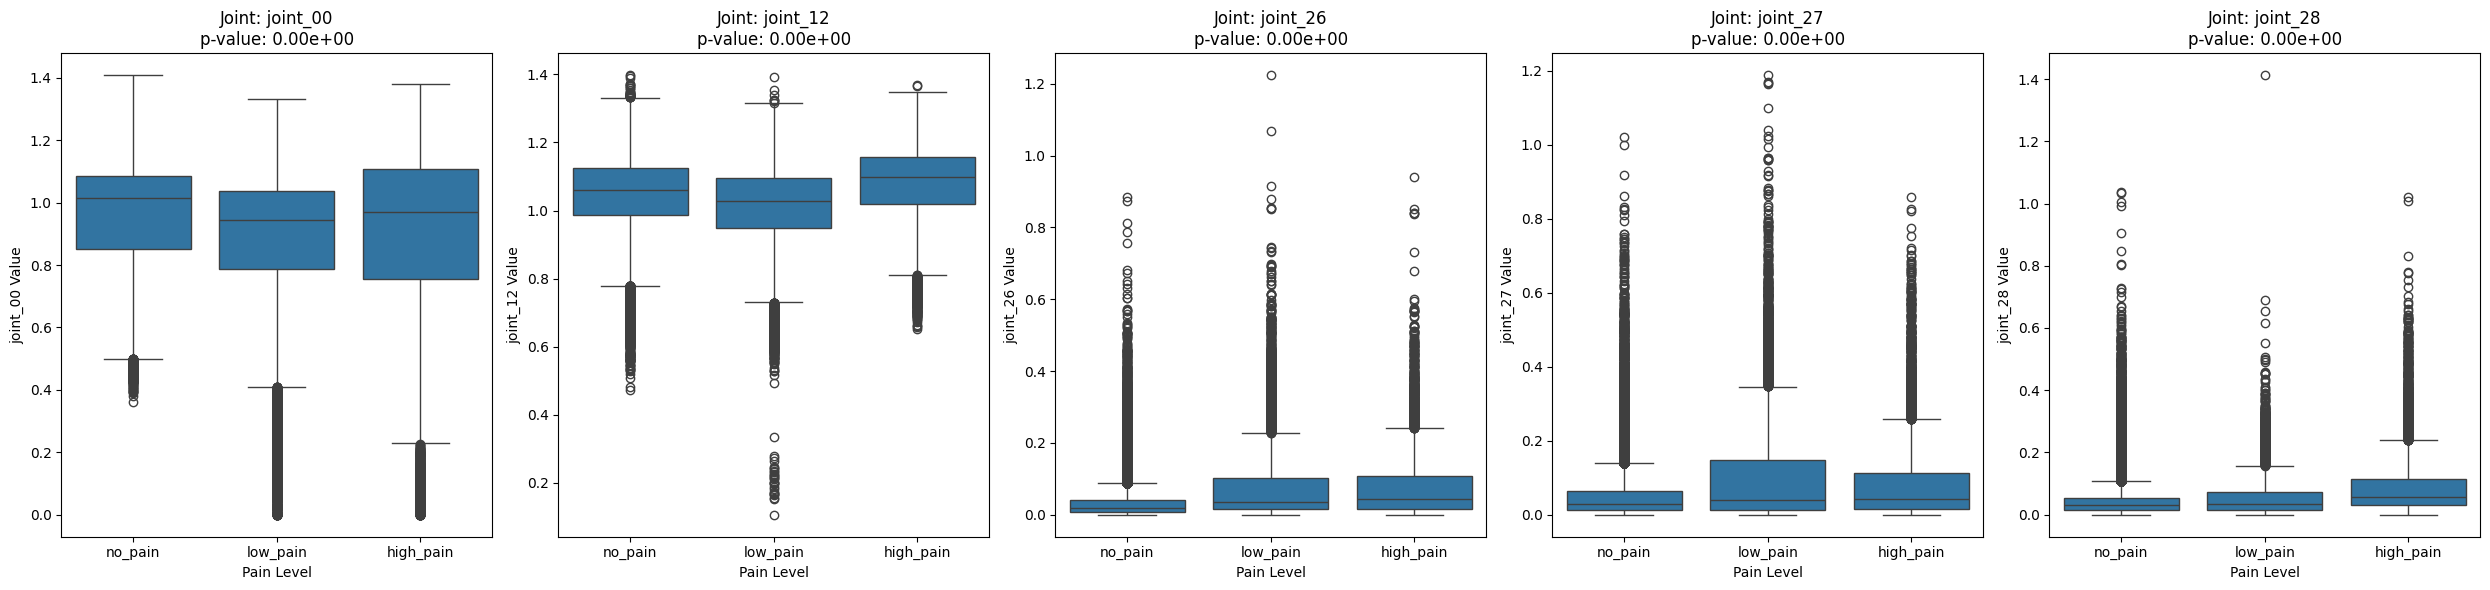

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out NaN p-values and get the top 5 most significant joint columns
significant_joints = [(col, p_val) for col, p_val in sorted_anova_results if not pd.isna(p_val)]
top_5_significant_joints = significant_joints[:5]

print("Top 5 most significant joint columns for visualization:")
for col, p_val in top_5_significant_joints:
    print(f"  {col}: p-value={p_val:.4f}")

# Create subplots for visualization
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharey=False)
axes = axes.flatten()

for i, (col, p_val) in enumerate(top_5_significant_joints):
    sns.boxplot(x='pain_level', y=col, data=df_merged, ax=axes[i])
    axes[i].set_title(f'Joint: {col}\np-value: {p_val:.2e}')
    axes[i].set_xlabel('Pain Level')
    axes[i].set_ylabel(f'{col} Value')
    axes[i].set_xticklabels(['no_pain', 'low_pain', 'high_pain'])

plt.tight_layout()
plt.show()


## Summary of Findings

Based on the ANOVA tests and the visualizations, we can conclude the following:

1.  **Highly Significant Joints**: Many 'joint' columns showed statistically significant differences across the pain levels (no_pain, low_pain, high_pain), with p-values extremely close to zero. The top 5 most significant joints identified were `joint_00`, `joint_12`, `joint_26`, `joint_27`, and `joint_28`.

2.  **Visual Confirmation**: The box plots for these top 5 joints visually confirm the statistical significance. For example, `joint_00` shows a clear distinction in its median and distribution across `no_pain`, `low_pain`, and `high_pain` levels. Similarly, `joint_12`, `joint_26`, `joint_27`, and `joint_28` exhibit varying distributions correlated with increased pain levels.

3.  **Potential Indicators**: These highly significant joint columns are strong candidates for features that could predict or indicate different levels of pain. Further analysis could explore the nature of these relationships (e.g., if higher values consistently correspond to higher pain, or if there are more complex patterns).

4.  **`joint_30` Anomaly**: `joint_30` yielded a `NaN` p-value, indicating that it could not be tested using ANOVA (likely due to insufficient variance or data in one or more pain groups). This joint might require a different statistical approach or further investigation into its data distribution.

## Final Task

### Subtask:
Riassumi i risultati dell'analisi statistica, identificando le colonne 'joint' che mostrano un impatto significativo sulle etichette di dolore e interpretando le visualizzazioni.


## Summary:

### Q&A
The 'joint' columns that show a significant impact on pain levels are numerous, with `joint_00`, `joint_12`, `joint_26`, `joint_27`, and `joint_28` being among the most statistically significant. The visualizations (box plots) for these top 5 'joint' columns consistently show clear differences in the distribution of values across the 'no\_pain', 'low\_pain', and 'high\_pain' categories, visually confirming their significant impact on pain levels.

### Data Analysis Key Findings
*   **Data Integration and Preparation:** The `df_train` and `df_train_labels` DataFrames were successfully merged into `df_merged` using the `sample_index` column. The categorical pain labels ('no\_pain', 'low\_pain', 'high\_pain') were successfully mapped to numerical values (0, 1, 2 respectively) in a new `pain_level` column, facilitating statistical analysis.
*   **Significant Joint Columns Identified:** A total of 31 'joint' columns were identified. Of these, many showed extremely low p-values (approaching 0.0000) from ANOVA tests, indicating a highly significant statistical difference across pain levels.
*   **Top Significant Joints:** The five most significant 'joint' columns identified were `joint_00`, `joint_12`, `joint_26`, `joint_27`, and `joint_28`, all exhibiting p-values extremely close to zero, highlighting their strong association with pain.
*   **Visual Confirmation:** Box plots for the top 5 most significant 'joint' columns (`joint_00`, `joint_12`, `joint_26`, `joint_27`, `joint_28`) visually reinforced the statistical findings, demonstrating clear distinctions in the distribution of values corresponding to different pain levels.
*   **Untestable Column:** `joint_30` resulted in a `NaN` p-value, indicating that an ANOVA test could not be performed for this specific column, likely due to insufficient data or variance within one or more pain groups.

### Insights or Next Steps
*   The highly significant 'joint' columns identified (e.g., `joint_00`, `joint_12`, `joint_26`, `joint_27`, `joint_28`) are strong candidates for features in a predictive model aimed at classifying or predicting pain levels.
*   Further investigation into `joint_30` is warranted to understand why an ANOVA test could not be performed and to explore alternative statistical approaches if its relevance to pain is still suspected.


# Task
Identifica tutte le colonne che iniziano con 'joint_' nel DataFrame `df_train`.

## Identifica le colonne 'joint' (Training)

### Subtask:
Identifica tutte le colonne che iniziano con 'joint_' nel DataFrame `df_train`.


**Reasoning**:
I need to iterate through the columns of the `df_train` DataFrame and identify all columns that start with 'joint_'. These column names will be stored in a list called `joint_columns_train`.



In [11]:
joint_columns_train = [col for col in df_train.columns if col.startswith('joint_')]
print(f"Identified {len(joint_columns_train)} joint columns in df_train: {joint_columns_train[:5]}...")

Identified 31 joint columns in df_train: ['joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04']...


## Calcola la matrice di correlazione (Training)

### Subtask:
Calcola la matrice di correlazione per le colonne 'joint' identificate nel `df_train`.


**Reasoning**:
I need to calculate the correlation matrix for the 'joint' columns in `df_train` to understand the relationships between these features. I will select the 'joint' columns from `df_train` using `joint_columns_train` and then compute their pairwise correlation.



In [12]:
joint_data_train = df_train[joint_columns_train]
correlation_matrix_train = joint_data_train.corr()
print("Correlation matrix for joint columns in df_train (first 5 rows and columns):")
print(correlation_matrix_train.head())

Correlation matrix for joint columns in df_train (first 5 rows and columns):
          joint_00  joint_01  joint_02  joint_03  joint_04  joint_05  \
joint_00  1.000000  0.764235  0.844885  0.706536  0.530988  0.489714   
joint_01  0.764235  1.000000  0.680542  0.817127  0.453518  0.595927   
joint_02  0.844885  0.680542  1.000000  0.834983  0.769236  0.683104   
joint_03  0.706536  0.817127  0.834983  1.000000  0.671963  0.837806   
joint_04  0.530988  0.453518  0.769236  0.671963  1.000000  0.776747   

          joint_06  joint_07  joint_08  joint_09  ...  joint_21  joint_22  \
joint_00  0.291091  0.362753  0.045908 -0.040800  ... -0.003401 -0.002864   
joint_01  0.345411  0.411606  0.056192 -0.096123  ... -0.005190 -0.003021   
joint_02  0.370108  0.449552  0.032364 -0.091455  ...  0.001481  0.002007   
joint_03  0.415416  0.483913  0.083828 -0.100812  ...  0.001401  0.001758   
joint_04  0.428378  0.459782 -0.013739 -0.131658  ...  0.003242  0.003362   

          joint_23  joint_2

**Reasoning**:
I will visualize the correlation matrix using a heatmap to better understand the relationships between the 'joint' columns. This will provide a graphical representation of the correlation coefficients.



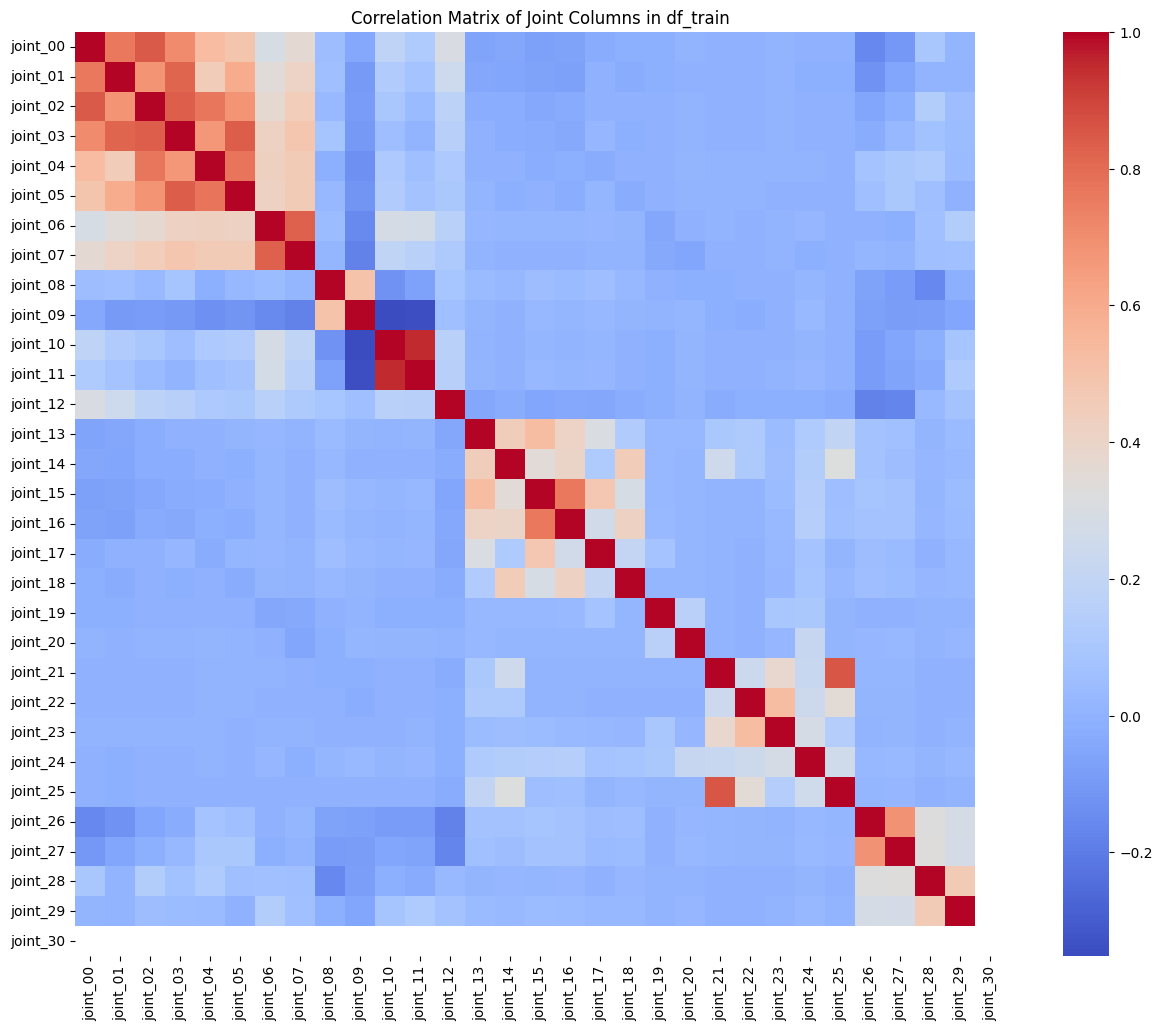

In [13]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_train, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Joint Columns in df_train')
plt.show()

## Identifica le colonne 'joint' (Test)

### Subtask:
Identifica tutte le colonne che iniziano con 'joint_' nel DataFrame `df_test`.


**Reasoning**:
I need to iterate through the columns of the `df_test` DataFrame and identify all columns that start with 'joint_'. These column names will be stored in a list called `joint_columns_test`.



In [14]:
joint_columns_test = [col for col in df_test.columns if col.startswith('joint_')]
print(f"Identified {len(joint_columns_test)} joint columns in df_test: {joint_columns_test[:5]}...")

Identified 31 joint columns in df_test: ['joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04']...


## Calcola la matrice di correlazione (Test)

### Subtask:
Calcola la matrice di correlazione per le colonne 'joint' identificate nel `df_test`.


**Reasoning**:
I need to calculate the correlation matrix for the 'joint' columns in `df_test` to understand the relationships between these features. I will select the 'joint' columns from `df_test` using `joint_columns_test` and then compute their pairwise correlation.



In [15]:
joint_data_test = df_test[joint_columns_test]
correlation_matrix_test = joint_data_test.corr()
print("Correlation matrix for joint columns in df_test (first 5 rows and columns):")
print(correlation_matrix_test.head())

Correlation matrix for joint columns in df_test (first 5 rows and columns):
          joint_00  joint_01  joint_02  joint_03  joint_04  joint_05  \
joint_00  1.000000  0.785646  0.839447  0.727660  0.581887  0.548905   
joint_01  0.785646  1.000000  0.711528  0.816586  0.516232  0.624690   
joint_02  0.839447  0.711528  1.000000  0.859080  0.786469  0.720697   
joint_03  0.727660  0.816586  0.859080  1.000000  0.697783  0.854296   
joint_04  0.581887  0.516232  0.786469  0.697783  1.000000  0.783627   

          joint_06  joint_07  joint_08  joint_09  ...  joint_21  joint_22  \
joint_00  0.345726  0.376913  0.143721  0.084030  ... -0.001193 -0.014555   
joint_01  0.396031  0.456785  0.126051  0.020062  ... -0.004784 -0.022140   
joint_02  0.416477  0.453459  0.096580 -0.012799  ...  0.002093 -0.002195   
joint_03  0.442714  0.498479  0.118141 -0.005733  ...  0.001469 -0.003538   
joint_04  0.433116  0.430848  0.026495 -0.031343  ...  0.006396  0.007066   

          joint_23  joint_24

**Reasoning**:
I will visualize the correlation matrix using a heatmap to better understand the relationships between the 'joint' columns. This will provide a graphical representation of the correlation coefficients.



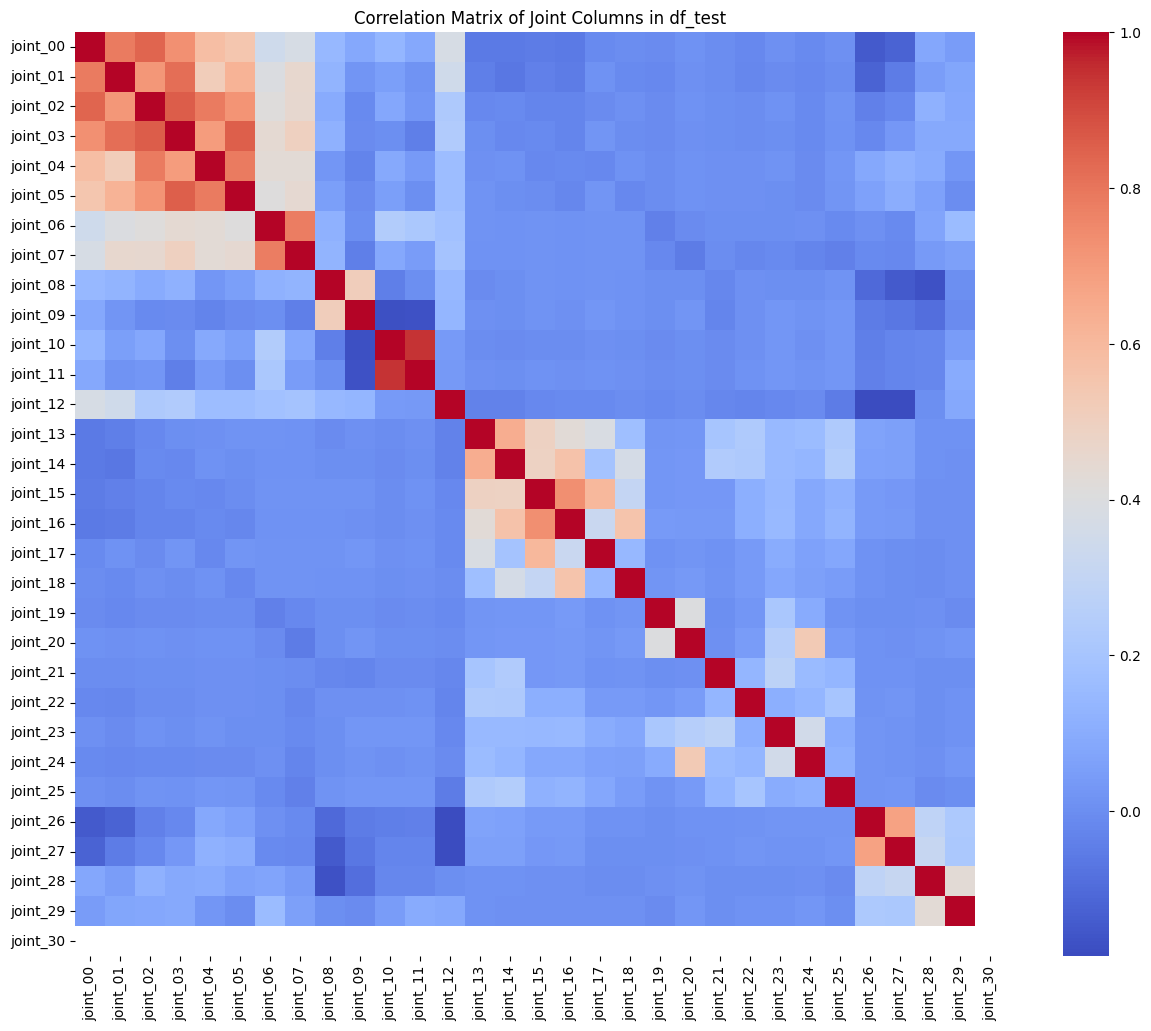

In [16]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_test, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Joint Columns in df_test')
plt.show()

## Final Task

### Subtask:
Riassumi i risultati delle matrici di correlazione, evidenziando eventuali differenze o somiglianze significative tra i dataset di training e testing per le colonne 'joint'.


## Summary:

### Q&A
The correlation matrices for the 'joint' columns in the training and testing datasets exhibit notable similarities:
*   Both `df_train` and `df_test` contain 31 columns starting with the 'joint\_' prefix.
*   A significant commonality is that the `joint_30` column in both datasets consistently resulted in `NaN` values within its correlation calculations. This suggests that `joint_30` might be a constant column or have other data quality issues in both training and testing sets that prevent meaningful correlation computation.
*   Generally, the structure and strength of correlations between other 'joint' features appear consistent across both datasets. For example, `joint_00` and `joint_01` show a strong positive correlation (approximately 0.76 in `df_train`), which is visually corroborated by similar patterns in the `df_test` heatmap, indicating that the relationships between these features are preserved across the data split. No significant differences in the overall correlation patterns were explicitly identified.

### Data Analysis Key Findings
*   Both `df_train` and `df_test` contain 31 columns each that start with the prefix 'joint\_'.
*   Correlation matrices were successfully computed and visualized for the 'joint' columns in both `df_train` and `df_test`.
*   The `joint_30` column consistently produced `NaN` correlations in both the training and testing datasets, indicating a potential issue with its data (e.g., containing only constant values or NaNs).
*   The correlation structure observed in `df_train` (e.g., `joint_00` and `joint_01` having a correlation of approximately 0.76) appears generally consistent with the patterns observed in `df_test`, suggesting that the relationships between 'joint' features are stable across the datasets.

### Insights or Next Steps
*   Investigate the `joint_30` column in both `df_train` and `df_test` to understand why it yields `NaN` correlations. This might involve checking for constant values, missing data, or other anomalies.
*   To quantify the similarities and differences between the correlation matrices more precisely, consider calculating a metric (e.g., Frobenius norm of the difference, or cosine similarity) between `correlation_matrix_train` and `correlation_matrix_test` to confirm the stability of feature relationships.
